Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Correlation Matrix:
                     step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000 -0.012889       0.001992        0.002714   
amount         -0.012889  1.000000       0.018753        0.025331   
oldbalanceOrg   0.001992  0.018753       1.000000        0.997895   
newbalanceOrig  0.002714  0.025331       0.997895        1.000000   
oldbalanceDest  0.003059  0.273661       0.124684        0.128072   
newbalanceDest -0.006528  0.374371       0.080616        0.080097   
isFraud              NaN       NaN            NaN             NaN   
isFlaggedFraud       NaN       NaN            NaN             NaN   

                oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
step                  0.003059   

c:\Users\naini\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


VIF Data:
           feature         VIF
0            step    1.428556
1          amount    3.782318
2   oldbalanceOrg  402.449844
3  newbalanceOrig  415.412624
4  oldbalanceDest  130.370763
5  newbalanceDest  142.959408
6         isFraud         NaN
7  isFlaggedFraud         NaN
Feature Importances:
 step              0.0
amount            0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFlaggedFraud    0.0
dtype: float64
Number of classes: 1
Confusion Matrix:
 [[1806030]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1806030

    accuracy                           1.00   1806030
   macro avg       1.00      1.00      1.00   1806030
weighted avg       1.00      1.00      1.00   1806030



c:\Users\naini\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1123: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


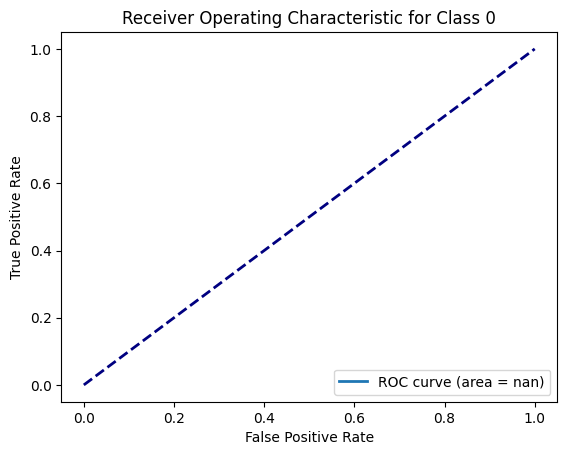

Top Key Factors:
 step              0.0
amount            0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
oldbalanceDest    0.0
dtype: float64


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data
data = pd.read_csv(r"C:\Users\naini\Downloads\Fraud.csv")

# Data Cleaning
# Handling Missing Values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Assuming no missing values in the dataset

# Handling Outliers using Z-score
from scipy import stats
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data = data[(z_scores < 3).all(axis=1)]

# Handling Multi-Collinearity
# Calculating the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
print("Correlation Matrix:\n", corr_matrix)

# Calculating VIF
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_data.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
print("VIF Data:\n", vif_data)
# Dropping columns with high VIF if necessary (threshold typically > 5)
# Assuming we don't drop any columns for this example

# Preprocessing
features = data.drop(['isFraud'], axis=1)
target = data['isFraud']

scaler = StandardScaler()
scaled_features =  scaler.fit_transform(features.select_dtypes(include=[np.number]))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

# Feature Importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features.select_dtypes(include=[np.number]).columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importance)

# Check the number of classes predicted by the model
num_classes = len(model.classes_)
print("Number of classes:", num_classes)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
predictions = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

# ROC Curve and AUC
if num_classes == 2:  # Binary classification
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:  # Multi-class classification
    y_pred_prob = model.predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
        # Plot ROC curve for each class
        plt.figure()
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic for Class %d' % i)
        plt.legend(loc="lower right")
        plt.show()

# Key Factors Predicting Fraudulent Customers
print("Top Key Factors:\n", feature_importance.head())


In [ ]:
print("hello")